Name: Hannah Jaeger

Name: Phyllis Sern

Name: Brittney Ibrahim

Name: Chloe Manavi

Name: Yuxuan Hu

Name:

In [1]:
suppressPackageStartupMessages({
    library(tidyr)
    library(dplyr)
    library(ggformula)
    library(mosaic)
    library(supernova)
    library(lsr)})

In [2]:
EAMMIdata <- read.csv(file = "https://bit.ly/2NGiyrS", header = TRUE) %>% drop_na(age)
head(EAMMIdata)


,MoAimportSUM,MoAachieveSUM,IDEA8_exp,IDEA8_negativity,IDEA8_identity,IDEA8_between,IDEA8All,PSS_Family,PSS_Friends,PSS_Special,⋯,USresidency,USresidencyyears,EA_Status,Election_date,Political_views,Party_affiliation,President_coded,DisabilityIdentity,RaceCoded,EducationCoded
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,77,37,4.0,3.5,3.5,4.0,3.750,6.50,6.00,6.75,⋯,1,19.0,1,1,NA,7,neither,2,3,1
2,68,33,4.0,3.5,3.0,4.0,3.625,5.00,3.50,6.75,⋯,1,18.0,1,1,4,2,Clinton,2,7,1
3,66,40,3.0,3.5,2.5,3.5,3.125,2.25,4.75,1.25,⋯,1,25.0,1,2,NA,NA,neither,2,3,1
4,61,39,3.0,4.0,3.5,3.5,3.500,1.75,3.50,6.75,⋯,1,21.0,1,1,NA,2,Sanders,2,1,1
5,44,31,3.0,3.5,3.0,3.5,3.250,4.00,4.75,4.75,⋯,1,17.5,1,2,NA,NA,CannotVote,2,1,1
6,63,51,3.5,3.0,4.0,4.0,3.625,5.00,5.75,6.75,⋯,1,23.0,1,2,4,NA,didnotvote,2,1,1


# Research Question

### Do people feel more or less satisfied with their life as they come out of emerging adulthood?

We chose this research question because all of the members in this group are going into the stage of emerging adulthood, so we were curious to know how others felt about this period of their life. We specifically wanted to see if people became happier about their lives as they have lived more of it. 

# Simple Model

### a) Word Equation

Life Satisfaction= Avg(LifeSatisfaction) + Error

Interpretation: The average life satisfaction is used to predict the life satisfaction of every individual. We want to see how well Avg(LifeSatisfaction) explains the the variable LifeSatisfaction. 




### b) GLM Equation

SWBscale= b0 + e

Interpretation: The mean of the SWBscale is used to predict the SWBscale of each individual.  

### c) Visualizations



Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


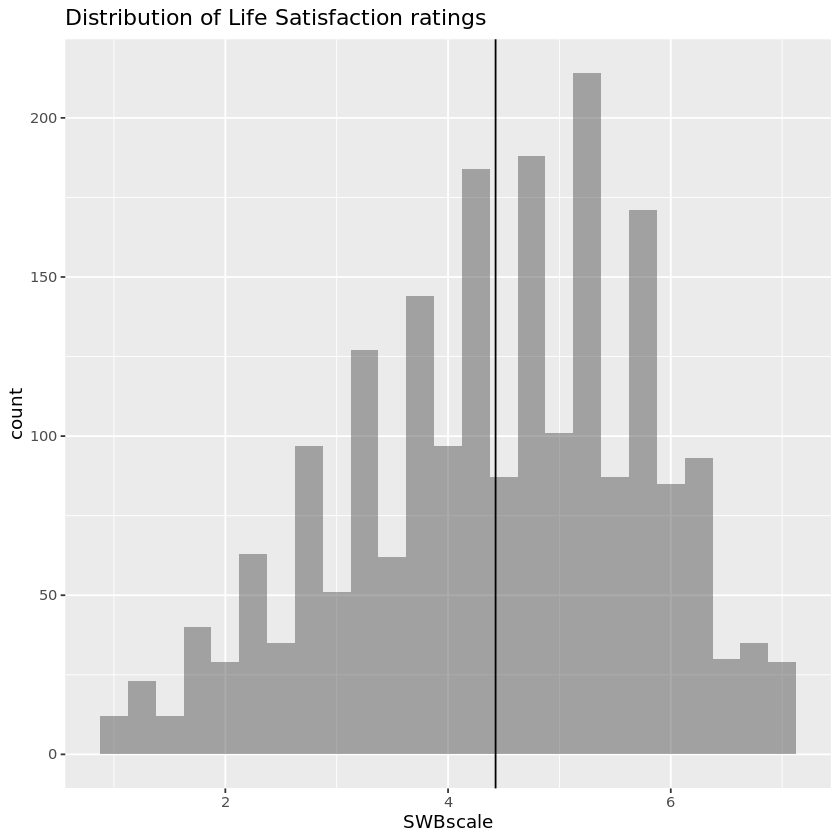

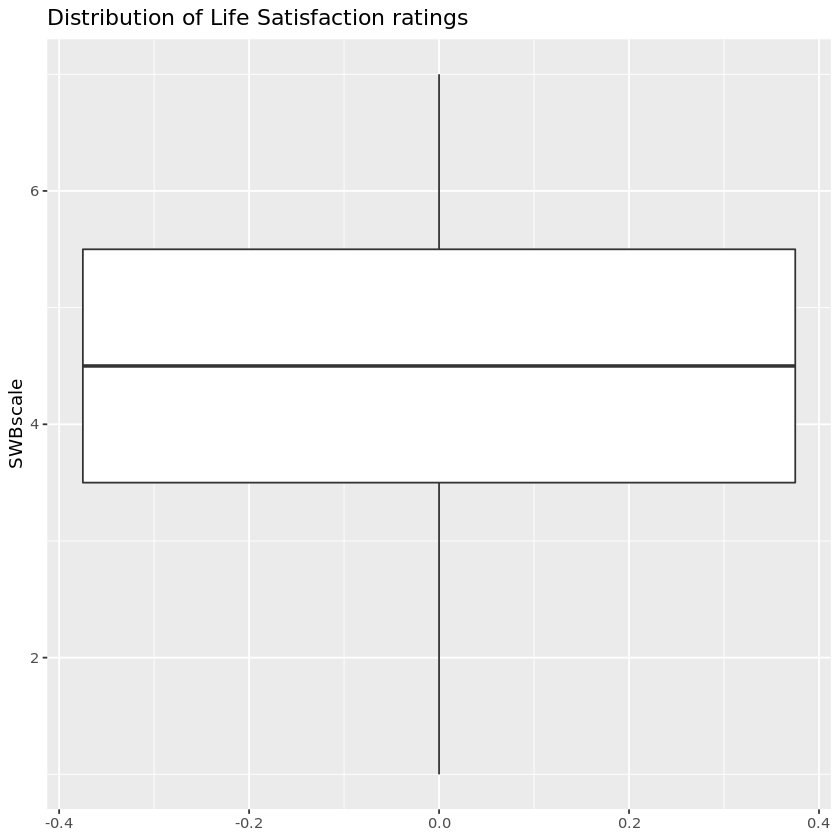

In [3]:
SWB.stats<- favstats(EAMMIdata$SWBscale)

gf_histogram(~SWBscale, data= EAMMIdata) %>%
gf_vline(xintercept=~mean, data= SWB.stats) %>%
gf_labs(title="Distribution of Life Satisfaction ratings")

gf_boxplot(~SWBscale, data= EAMMIdata) %>%
gf_labs(title="Distribution of Life Satisfaction ratings")

Interpretation: The histogram and boxplot distribution are slightly skewed to the left. The histogram shows the number of individuals with different SWBscale and the box plot shows a five-number summary of the data set.

Compare and Contrast: 

Both the histogram and the box plot show that this distribution is slightly skewed to the left. They also both show the range of the data. 

However, the histogram shows the counts for this group of data on the y-axis, and the means are on the x-axis. Whereas, in the box plot, the y-axis represents the means and does not show explicitly the counts for each of the means. Instead, the box plot shows the 5 important descriptive values from the data set: min, first quartile, median, third quartile, and max. 

### d) Fit a linear model

In [4]:
simplemodel<-lm(SWBscale~NULL, data=EAMMIdata)
simplemodel


Call:
lm(formula = SWBscale ~ NULL, data = EAMMIdata)

Coefficients:
(Intercept)  
      4.427  


New GLM Equation interpreted from the data: LifeSatisfaction= 4.427+ Error

Interpretation: The model estimates a value of 4.427 on the SWB scale for each individual. The intercept of 4.427 is the expected mean value of Y when X=0. Since it is an empty model, all the predicted outcomes will be equal to one another. 

### e) Quantifying Error (ANOVA)

In [5]:
supernova(simplemodel)

Note: 1 case removed due to missing value(s).



 Analysis of Variance Table (Type III SS)
 Model: SWBscale ~ NULL
 
                               SS   df    MS   F PRE   p
 ----- --------------- | -------- ---- ----- --- --- ---
 Model (error reduced) |      ---  ---   --- --- --- ---
 Error (from model)    |      ---  ---   --- --- --- ---
 ----- --------------- | -------- ---- ----- --- --- ---
 Total (empty model)   | 3675.819 2094 1.755            

Interpretation: The total SS error for the empty model (simple model) is 3675.819 which is the variation in the model attributed to error. The total degrees of freedom are 2094 which is the number of data we have as well as the number of parameters we need to estimate. The mean squared error(variance) is 1.755 which tells us how close the regression line is to our set of points; we can calculate mean squared error by dividing total sum of squared errors by the degrees of freedom of the model. 

### f) Visualization of sampling variability

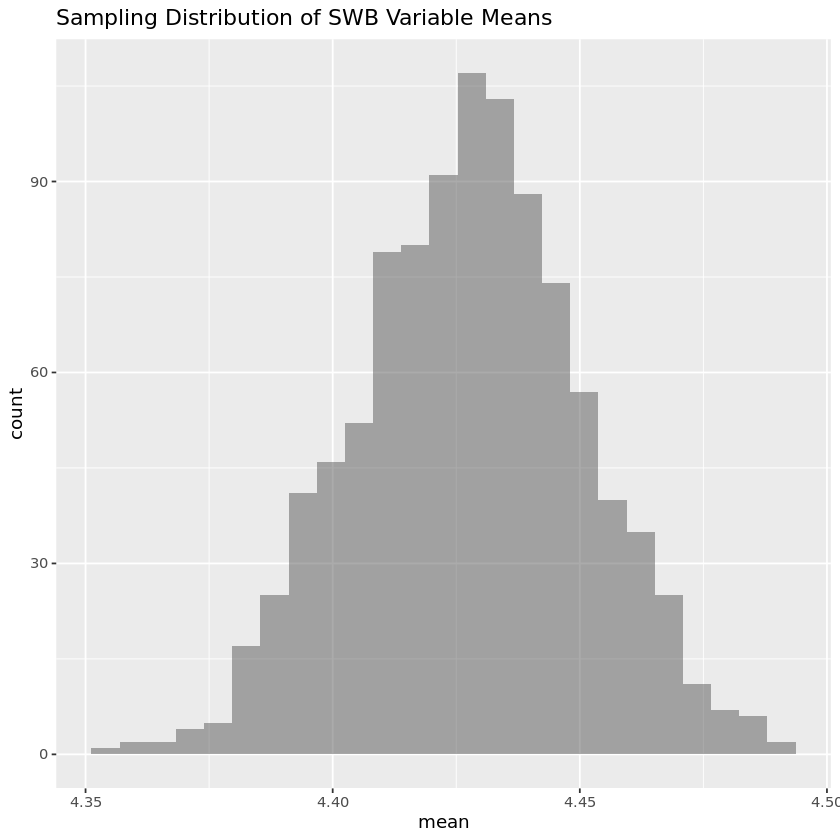

In [6]:
samplingvar1<-do(1000) * mean(rnorm(3134, mean = SWB.stats$mean, sd = SWB.stats$sd))
gf_histogram(~ mean, data = samplingvar1) %>%
gf_labs(title="Sampling Distribution of SWB Variable Means")

Interpretation: The data displays 1000 means taken from normal distributions with 3134 objects with the same mean and standard deviation as our observed SWB variable. The histogram is unimodal and has a roughly normal distribution centered around the mean of 4.427. 

### g) Numeric description of sampling variability

In [7]:
favstats(samplingvar1$mean)

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,4.354354,4.411737,4.427953,4.442759,4.491131,4.427655,0.0227701,1000,0


Interpretation: The standard error on the sampling distribution is around 0.02277528, which is the variation that attributes to error. The values will slightly change every time we run the code because of sampling variation. The sampling distribution is centered around the value 4.426, which is very similar to our intercept to the empty model.

### h) Confidence intervals



In [8]:
confint(simplemodel)


,2.5 %,97.5 %
(Intercept),4.370021,4.48351


Interpretation: We are 95% confident that the true population mean is somewhere between 4.37 and 4.48.


### j) Conclusion

The simple model uses the mean value on the Life Satisifaction scale to predict each individual's life satisfaction. The mean value on the Life Satisifaction scale in our data is 4.427. The sum of squared errors for this model is high with a value of 3675.819, as estimated by our superanova table. Using a sampling distribution of the mean, we are able to see what means are likely to come from the DGP that produced our mean, assuming a normal distribution. The calculated confidence interval for this mean indicates that we are 95% confident that the true mean lies between 4.37 and 4.48. This model will be used in comparison with others to determine whether or not age is a predictor variable of life satisfaction. This model shows the predicated relationship if there was no relationship between age and life satisfaction. 

# Qualitative Predictor Model

### a) Word Equation

Life Satisfaction= AgeGroup + Error

Interpretation: The equation takes into account the person's age group to calculate the predicted life satisfaction. An individuals AgeGroup plus its residual explains the variation in the outcome variable "LifeSatisfaction". 

### b) GLM Equation

SWBscale=b0 +b1UpperAgeGroupi + ei

Interpretation: At a population level, an individuals value on the SWBscale is the individuals age group plus error. Using our data, An individuals value on the SWBscale is predicted by adding the average differenceon the SWBscale between the lower and upper age group to the mean SWBscale of the lower group. 

### c) Visualizations

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


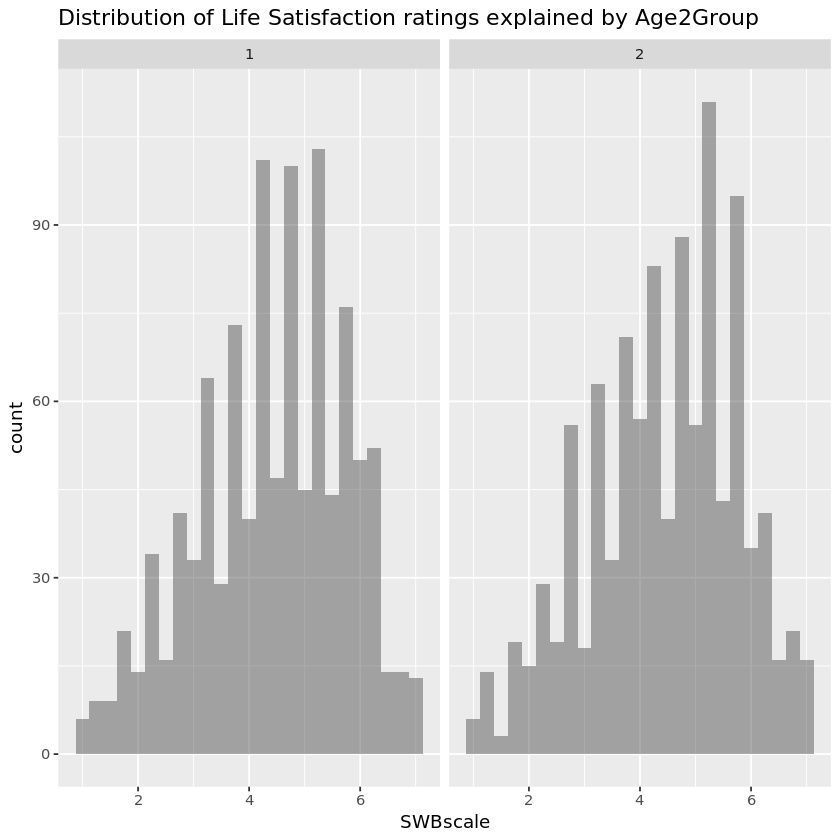

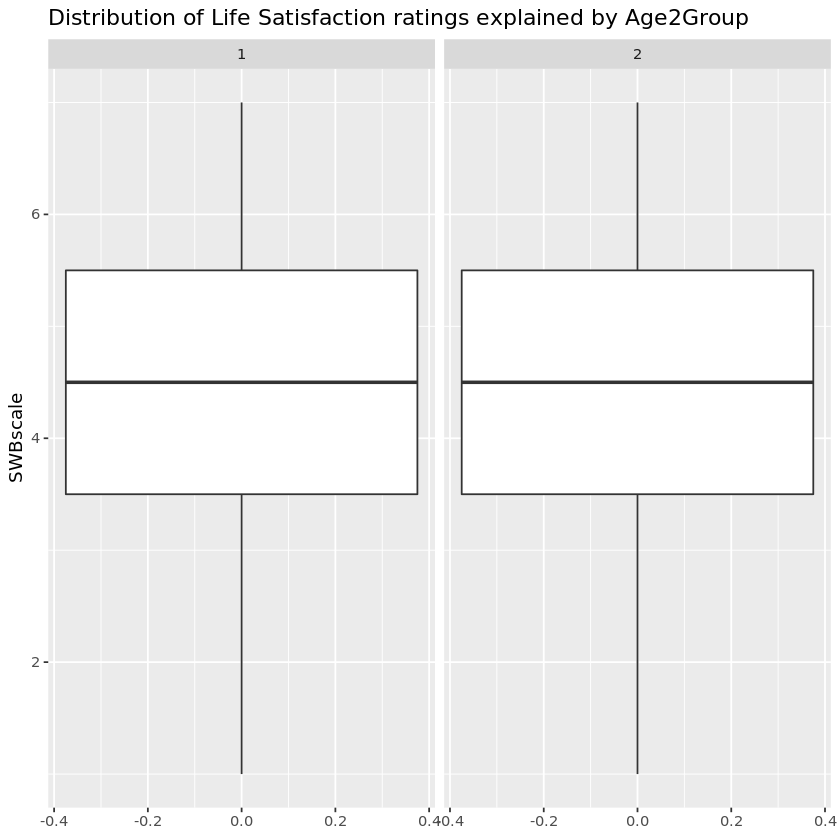

In [9]:
EAMMIdata$Age2Group <-ntile(EAMMIdata$age,2)

gf_histogram(~SWBscale, data= EAMMIdata) %>%
gf_facet_grid(.~Age2Group) %>%
gf_labs(title="Distribution of Life Satisfaction ratings explained by Age2Group")

gf_boxplot(~SWBscale, data= EAMMIdata)%>%
gf_facet_grid(.~Age2Group) %>%
gf_labs(title="Distribution of Life Satisfaction ratings explained by Age2Group")

Interpretation: Both histograms are unimodal and are slightly skewed to the left, with the second histogram to be a little bit more skewed than the first. Both boxplots are also slightly skewed to the left, show the range of the means, and look almost identical to each other. This indicates that there is very little difference between the two age groups in life satisfaction. 

Compare and Contrast:

Both the histogram and the box plot show the distribution and the range of the data. For both types of visualizations, there appears to be no difference between the young and old groups.

The histogram shows the counts for this group of data on the y-axis and the means are on the x-axis. On the other hand, the y-axis in the boxplot represents the means and does not explicitly show the counts for each of the means. Instead, the box plot displays the 5 important descriptive values from the data set: min, first quartile, median, third quartile, and max. 

### d) Fit a linear model

In [10]:
twogroupmodel<-lm(SWBscale~Age2Group, data= EAMMIdata)
twogroupmodel


Call:
lm(formula = SWBscale ~ Age2Group, data = EAMMIdata)

Coefficients:
(Intercept)    Age2Group  
    4.41078      0.01066  


New GLM Equation interpreted from the data:

LifeSatisfaction= 4.41 + 0.01(AgeGroup)+ Error

Interpretation: Beta0, or the intercept, is the average life satisfaction for people in the lower age group. The average for people in the lower age group estimated by the model is 4.41.

Beta1 is the average difference of lifesatisfaction between the lower and upper age group; this difference is estimated to be 0.01066.

### e) Quantifying Error (ANOVA)

supernova(twogroupmodel)


In [11]:
supernova(twogroupmodel)

Note: 1 case removed due to missing value(s).



 Analysis of Variance Table (Type III SS)
 Model: SWBscale ~ Age2Group
 
                               SS   df    MS     F    PRE     p
 ----- --------------- | -------- ---- ----- ----- ------ -----
 Model (error reduced) |    0.059    1 0.059 0.034 0.0000 .8540
 Error (from model)    | 3676.338 2094 1.756                   
 ----- --------------- | -------- ---- ----- ----- ------ -----
 Total (empty model)   | 3676.397 2095 1.755                   

Interpretation:  

The SS total for the qualitative predictor model is 3676.397. This tells us how much variability there is in the outcome variable Life Satisfaction. This variability is high. The SS model is 0.059. This tells us how many sums of squared errors we've explained using age. Age explains very little. The SS error tells us how many sums of squared errors in Life Satisfaction are left unexplained. The SS error is 3676.33 meaning that a lot of SS error is left unexplained. The mean squared error for the model is 0.06. This measures the explained sums of squares per degree of freedom. In this case it is very small, telling us that age does not explain a lot of variation per degree of freedom. The F statistic is 0.034, which is close to one, meaning that we are explaining very little variability per degree of freedom. Out of all of the variability in Life satisfaction, the PRE measures how much we have explained using age. In this case we have explained around 0% of variability in Life satisfaction using age. Finally the p value tells us the probability of seeing the observed statistic, if the population parameters were the same as the simple model. In this case there is a 0.854 probability which means that it is likely our data could have occured under the null hypothesis.

### f) Visualization of sampling variability

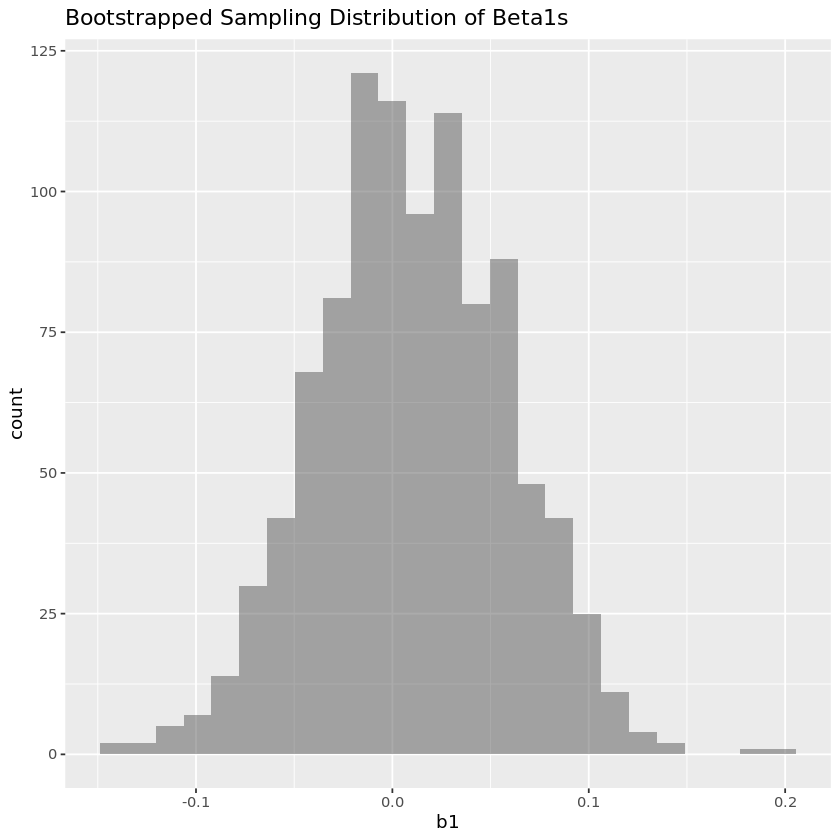

In [12]:
samplingvar2 <- do(1000) * b1(SWBscale~Age2Group, data = resample(EAMMIdata, 3134))
gf_histogram(~ b1, data = samplingvar2) %>%
gf_labs(title="Bootstrapped Sampling Distribution of Beta1s")

Interpretation: The graph shows a distribution of 1000 beta1s from a regression of SWBscale on AgeGroup2 of resampled samples from our data with 3,134 objects in each sample. The histogram is unimodal and it is normally distributed. The histogram is roughly symmetrical. It is not perfectly symmetrical because we are resampling from the orginal data in bootstrapping. This graph displays all the possible Beta1 values if the true Beta1 was 0. 

### g) Numeric description of sampling variability

In [13]:
summary(twogroupmodel)

SDob0 <- do(1000)*b0(SWBscale~Age2Group, data = resample(EAMMIdata, 3134))
favstats(~b0, data=SDob0)
favstats(~b1, data=samplingvar2) 



Call:
lm(formula = SWBscale ~ Age2Group, data = EAMMIdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4321 -0.9214  0.0786  1.0679  2.5786 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.41078    0.09152  48.194   <2e-16 ***
Age2Group    0.01066    0.05788   0.184    0.854    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.325 on 2094 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  1.618e-05,	Adjusted R-squared:  -0.0004614 
F-statistic: 0.03389 on 1 and 2094 DF,  p-value: 0.854


,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,4.200639,4.359234,4.411155,4.461628,4.673569,4.411715,0.07481304,1000,0


,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,-0.1483561,-0.02160397,0.008350912,0.04446429,0.1918782,0.01035305,0.04803829,1000,0


Interpretation: 

The dataframe we created consisted of b0's taken from the fitted qualitative model of 1000 bootstrapped sample from the original sample. The intercept of our model is the same as the center of our dataframe which is approximately 4.41. Additionally, the standard error is 0.077. Standard error measures the spread of our estimates relative to the regression line. 

The dataframe we created consisted of b1's taken from the fitted qualitative model of 1000 bootstrapped sample from the original sample. The slope of our model is very similar to the center of our dataframe which is approximately 0.09. The standard error is 0.047.  Standard error measures the spread of our estimates relative to the regression line. 

The values will slightly change every time we run the code because of sampling variation.

We can also use the summary function to find the standard error. This reports a standard error of 0.09 for beta0 and a standard error of 0.06 for beta1. These values are different because the function uses different ways of calculating standard error. 

### h) Confidence intervals

In [14]:
confint(twogroupmodel)


,2.5 %,97.5 %
(Intercept),4.2312996,4.5902653
Age2Group,-0.1028597,0.1241701


Interpretation: It can be said with 95% confidence that the true intercept of the population is between 4.2312996 and 4.5902653. Also, we are 95% confident that the population Beta1 is between -0.1028587 and 0.1241701. 

### i) Model Comparison

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2095,3676.397,NA,NA,NA,NA
2,2094,3676.338,1,0.05949162,0.03388575,0.8539679


[1] 0.8539679

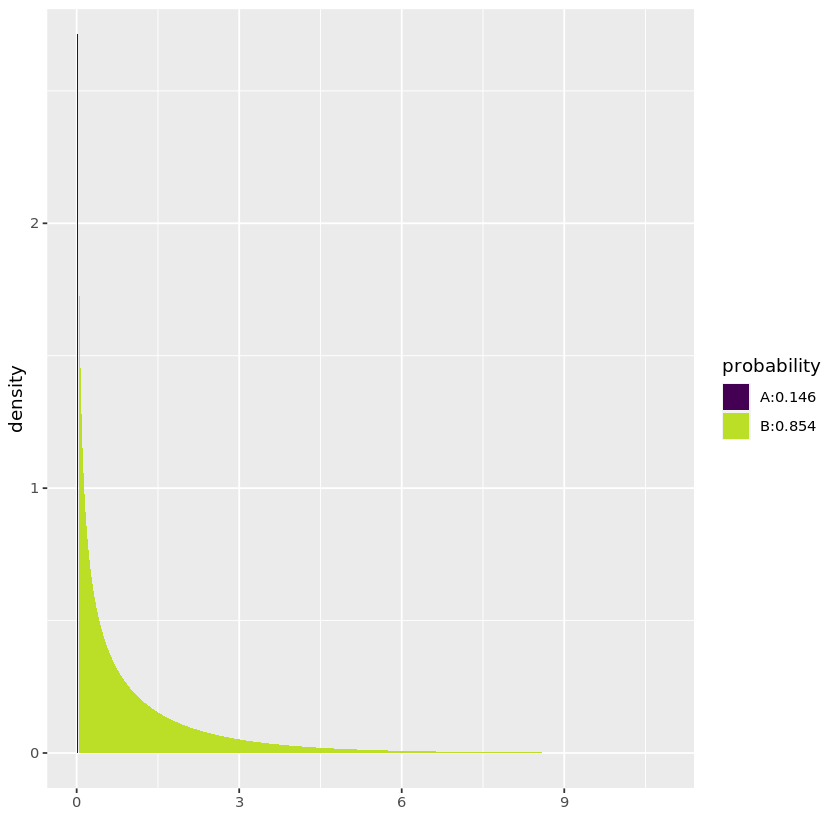

In [15]:
anova(simplemodel, twogroupmodel)
xpf(fVal(twogroupmodel), 1, 2094, lower.tail=FALSE)

The simple model shows us the predicted relationship between life satisfaction and age if $\beta_1$ is equal to 0. We want to see if the qualitative predictor model, using age groups, better estimates life satisfaction. The qualitative predictor model estimates beta0 as 4.41 and beta1, the average difference between the lower and upper age groups on the SWB scale, as 0.01. This is a very small difference compared to the simple model, which estimates 4.427 for each individual. The sum of squared error reduced by the qualitative model compared to the simple model is  0.059. This is very small. The F statistic is 0.034, which looks at the multiple squared error of the model per the multiple squared error for the error. This is also very small. The PRE suggests that very little variability in life satisfaction is explained by age relative to the simple model. Ultimately, the p value suggests that we cannot reject the null hypothesis that $\beta_1$ is 0. The graph above shows us the probability of getting our observed F statistic if the DGP was the simple model. The p value is 0.8540, which is greater than an alpha level of 0.05. This is also reflected in 95% confidence interval, which includes 0. This means that we would not reject the simple model.

### j) Conclusion

The qualitative model suggests that we cannot conclude that there is a relationship between age and life satisfaction. The estimates of the model are not statistically significant and very little variation in life satisfaction is explained by age in this model. As a result, we would continue to use the simple model over the qualitative model. We would conclude that the impact of age on life satisfaction is very small or zero within the population. 

# Quantitative Predictor Model

### a) Word Equation

Life Satisfaction= Age + Error

Interpretation: The equation shows the persons age and adds error to calculate life satisfaction.

### b) GLM Equation

$LifeSatisfaction_i= \beta_0 + \beta_1 Age_i + \epsilon_i$

Interpretation: The SWBscale for each individual is predicted by adding the average difference of SWBscale between each unit of age to the intercept of when Age=0. 

### c) Visualizations



Warning message:
“Removed 1 rows containing non-finite values (stat_lm).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing non-finite values (stat_lm).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


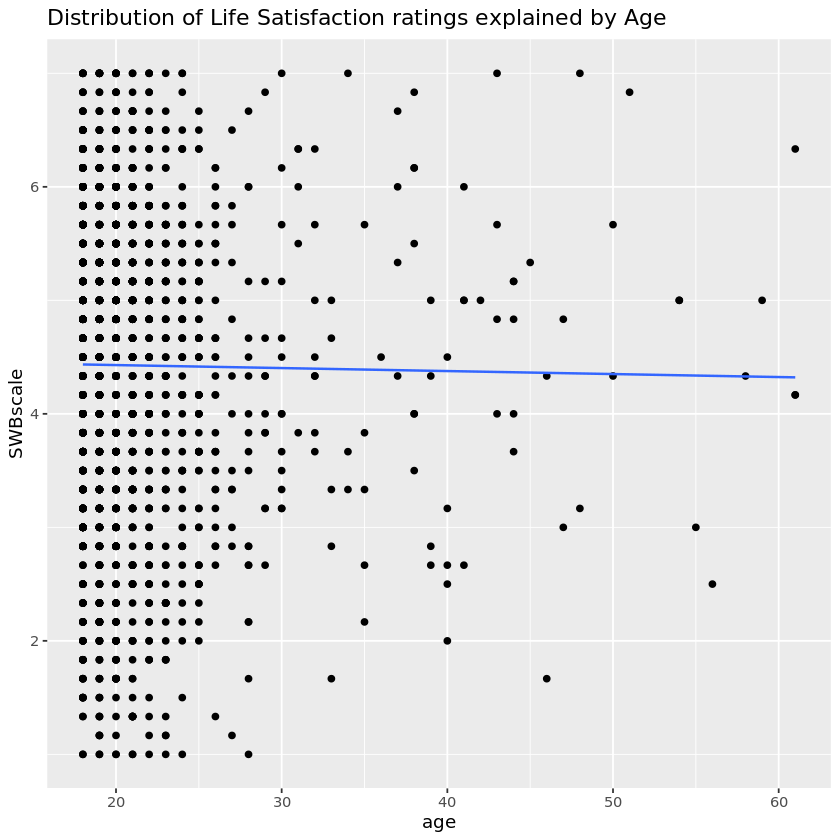

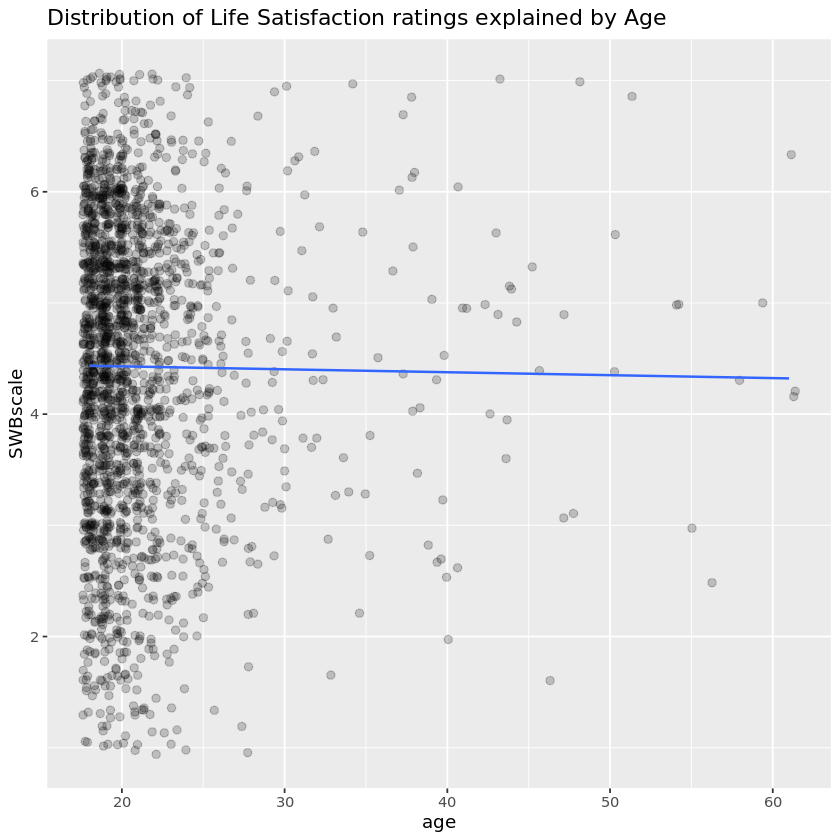

In [16]:
gf_point(SWBscale~age, data= EAMMIdata) %>% gf_lm %>%
gf_labs(title="Distribution of Life Satisfaction ratings explained by Age")

gf_jitter(SWBscale~age, data= EAMMIdata, alpha = 0.2, size = 2) %>% gf_lm %>%
gf_labs(title="Distribution of Life Satisfaction ratings explained by Age")

Interpretation: The scatter and jitterplot show the relationship between age and SWBscale. Using the lm regression line, we are able to see a slightly negative relationship between the 2. However, the data does not look as though there is much impact of age on SWBscale. 

Compare and Contrast:

Both the scatter and jitter plot have the same x-axis to represent age and the same y-axis to represent the means. It can be hard to tell when a point is on top of another point in the scatterplot, so in the jitter plot, it "jitters" the points vertically and horizontally, so it can show when each data point has repeats. 

### d) Fit a linear model

In [17]:
quantitativemodel<-lm(SWBscale~age , data=EAMMIdata)
quantitativemodel


Call:
lm(formula = SWBscale ~ age, data = EAMMIdata)

Coefficients:
(Intercept)          age  
   4.482440    -0.002638  


GLM Equation: LifeSatisfaction= 4.482 -0.0026(Age)+ Error

Interpretation: 

The model estimates that when age is equal to 0, life satisfaction will be 4.482. 

The model estimates that for two cases that differ by one unit on age, their life satisfaction value is expected to differ by -0.0026, where the case that is higher on age is expected to be lower on life satisfaction. 

### e) Quantifying Error (ANOVA)


In [18]:
supernova(quantitativemodel)

Note: 1 case removed due to missing value(s).



 Analysis of Variance Table (Type III SS)
 Model: SWBscale ~ age
 
                               SS   df    MS     F    PRE     p
 ----- --------------- | -------- ---- ----- ----- ------ -----
 Model (error reduced) |    0.338    1 0.338 0.192 0.0001 .6609
 Error (from model)    | 3676.059 2094 1.756                   
 ----- --------------- | -------- ---- ----- ----- ------ -----
 Total (empty model)   | 3676.397 2095 1.755                   

Interpretation: The SS total for the quantitative predictor model is 3676.397. This tells us how much variability there is in the outcome variable Life Satisfaction. This variability is high. The SS model is 0.338. This tells us how many sums of squared errors we've explained using age. Age explains very little. The SS error tells us how many sums of squared errors in Life Satisfaction are left unexplained. The SS error is 3676.059 meaning that a lot of SS error is left unexplained. The mean squared error for the model is 0.338. This measures the explained sums of squares per degree of freedom. In this case it is very small, telling us that age does not explain a lot of variation per degree of freedom. The F statistic is 0.192, which is close to one, meaning that we are explaining very little variability per degree of freedom. Out of all of the variability in Life satisfaction, the PRE measures how much we have explained using age. In this case we have explained 0.01% of variability in Life satisfaction using age. Finally the p value tells us the probability of seeing the observed statistic if the population parameters were the same as the simple model. In this case there is a 0.6609 probability, which means that it is likely our data could have occured under the null hypothesis.

### f) Visualization of sampling variability

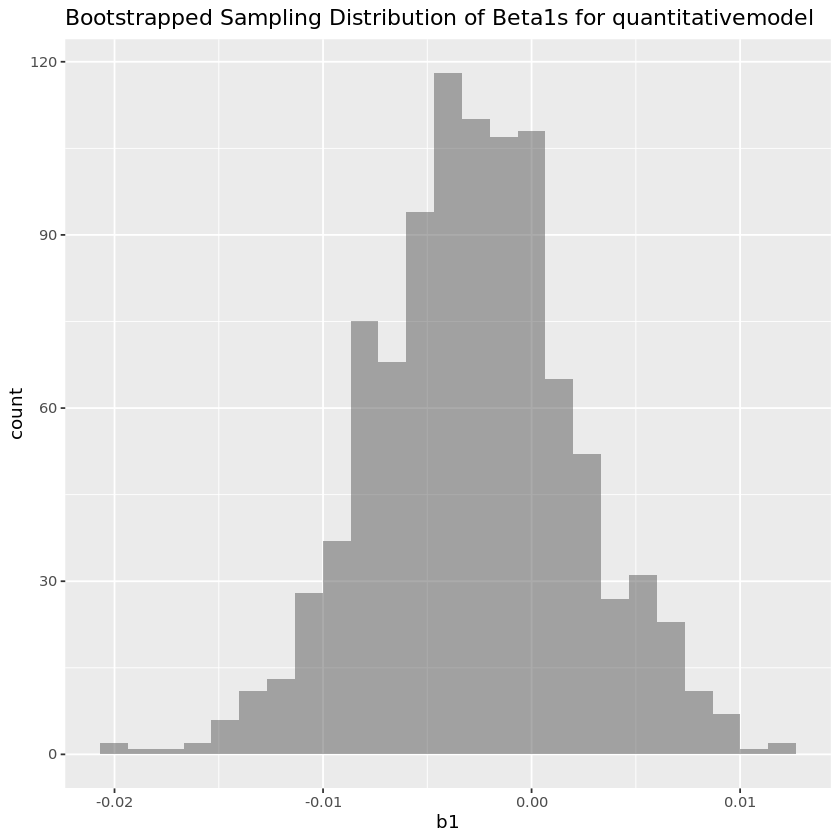

In [19]:
samplingvar3 <- do(1000) * b1(SWBscale~age, data = resample(EAMMIdata, 3134))
gf_histogram(~ b1, data = samplingvar3) %>%
gf_labs(title="Bootstrapped Sampling Distribution of Beta1s for quantitativemodel ")

Interpretation: The graph shows a distribution of 1000 beta1s from a regression of SWBscale on age of resampled samples from our data with 3,134 objects in each sample. The histogram is unimodal and it is normally distributed. The histogram is roughly symmetrical. It is not perfectly symmetrical because we are resampling from the orginal data in bootstrapping. This graph displays all the possible Beta1 values if the true Beta1 was 0. 

### g) Numeric description of sampling variability

In [20]:
SDob0 <- do(1000)*b0(SWBscale~age, data = resample(EAMMIdata, 3134))
favstats(~b0, data = SDob0)
favstats(~b1, data=samplingvar3) 

summary(quantitativemodel)



,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,4.179389,4.414674,4.489827,4.561719,4.791898,4.487716,0.1079329,1000,0


,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,-0.02045722,-0.005874888,-0.002776031,0.0001695396,0.01158482,-0.002754239,0.004846745,1000,0



Call:
lm(formula = SWBscale ~ age, data = EAMMIdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4349 -0.9297  0.0769  1.0651  2.6442 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.482440   0.130161  34.438   <2e-16 ***
age         -0.002638   0.006014  -0.439    0.661    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.325 on 2094 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  9.191e-05,	Adjusted R-squared:  -0.0003856 
F-statistic: 0.1925 on 1 and 2094 DF,  p-value: 0.6609


Interpretation: The dataframe we created consisted of b0's taken from the fitted qualitative model of 1000 bootstrapped sample from the original sample. The intercept of our model is the same as the center of our dataframe which is approximately 4.48. The standard error is 0.1091. Standard error measures the spread of our estimates relative to the regression line. 

The dataframe we created consisted of b1's taken from the fitted qualitative model of 1000 bootstrapped sample from the original sample. The slope of our model is very similar to the as the center of our dataframe which is approximately -0.0027. The standard error is 0.005. Standard error measures the spread of our estimates relative to the regression line. 

The values will slightly change every time we run the code because of sampling variation.

We can also use the summary function to find the standard error. This reports a standard error of 0.130161 for beta0 and a standard error of 0.006014 for beta1. These values are different because the function uses different ways of calculating standard error. 

### h) Confidence intervals


In [21]:
confint(quantitativemodel)


,2.5 %,97.5 %
(Intercept),4.22718174,4.737699081
age,-0.01443227,0.009155407


Interpretation: It can be said with 95% confidence that the true beta0 of the population is between 4.22718194 and 4.737699081. Also, we are 95% confident that the population Beta1 is between -0.0144322 and 0.009155407. 

### i) Model Comparison


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2095,3676.397,NA,NA,NA,NA
2,2094,3676.059,1,0.3378975,0.1924771,0.6609081


[1] 0.6609081

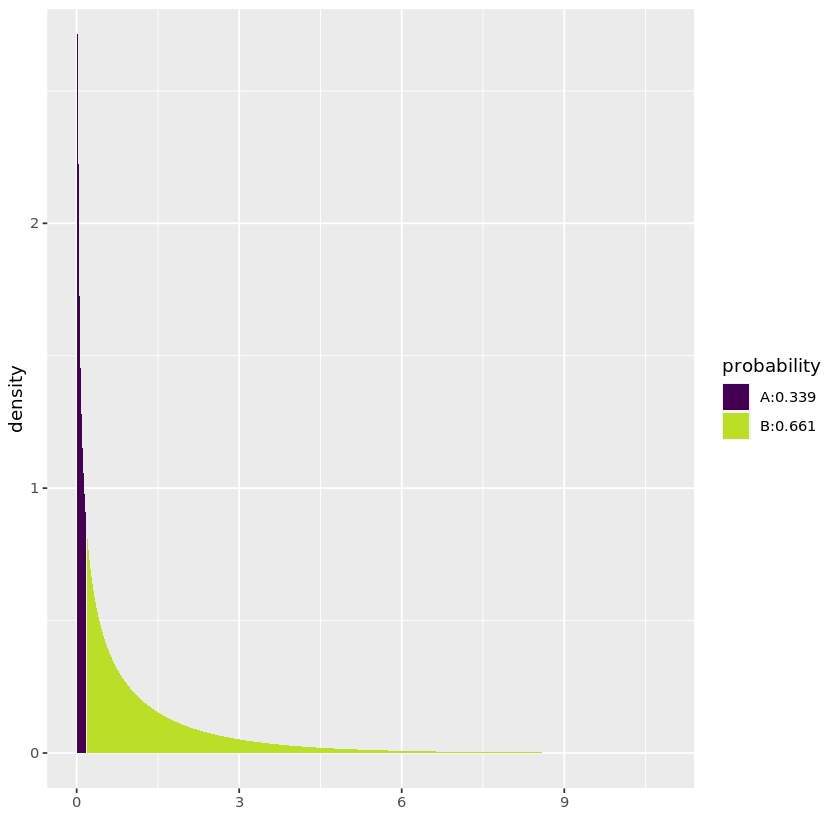

In [22]:
anova(simplemodel, quantitativemodel)
xpf(fVal(quantitativemodel), 1, 2094, lower.tail=FALSE)

The quantitative predictor model uses age as a continuos variable in order to estimate outcomes in life satisfaction. We compare this to the simple model in order to determine whether or not there is a relationship between life satisfaction and age. The quantitative predictor model predicts that for every one unit increase in age there will be a 0.0026 decrease in life satisfaction value on the SWB scale. The impact predicted by beta1 is small. The sum of squared errors reduced by the quantitative predictor model is 0.338, which is very small compared to the simple model. This is, however, larger than the sum of squared errors reduced by the qualitative predictor model, 0.059. The quanitivative model also has a higher F value and PRE compared to the qualitative predictor model, but both are still very small. The graph above shows us the probability of getting our observed F statistic if the DGP was the simple model. The p value is 0.6609, which is larger than an alpha level of 0.05. This means that the estimates of this model are not statistically significant and that we cannot reject the null hypothesis that $b1=0$. This is also reflected in the 95% confidence interval, which includes 0. While slightly more variation is explained in this model than the qualitative one we would ultimately, keep the simple model.

### j) Conclusion

The quantitative predictor model indicates that we cannot conclude that there is a relationship between life satisfaction and age. The p-value indicates that the estimates of this model are not statistically significant and that very little variation in life satisfaction is explained by age. We would then conclude that we cannot reject the simple model and that as people get older, we do not necessarily get more satified with our lives. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdd6ede9-a8b0-45c7-992c-b46944090e62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>